In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)
    
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

In [3]:
 # Load dataset
inputs, targets = load_data("Data.json")

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3)

In [4]:
model = keras.Sequential([
    # Input layer
    Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    # Hidden layers
    Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.3),
    # Output layer
    Dense(len(np.unique(targets)), activation='softmax')
])

In [5]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)

In [6]:
# Compile the model
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [11]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
219/219 [==============================] - 2s 11ms/step - loss: 2.9406 - accuracy: 0.2943 - val_loss: 2.8662 - val_accuracy: 0.3368
Epoch 2/100
219/219 [==============================] - 2s 11ms/step - loss: 2.8947 - accuracy: 0.2941 - val_loss: 2.8119 - val_accuracy: 0.3441
Epoch 3/100
219/219 [==============================] - 2s 9ms/step - loss: 2.8614 - accuracy: 0.2940 - val_loss: 2.7511 - val_accuracy: 0.3528
Epoch 4/100
219/219 [==============================] - 2s 9ms/step - loss: 2.8096 - accuracy: 0.3067 - val_loss: 2.7094 - val_accuracy: 0.3405
Epoch 5/100
219/219 [==============================] - 2s 9ms/step - loss: 2.7950 - accuracy: 0.3030 - val_loss: 2.6882 - val_accuracy: 0.3525
Epoch 6/100
219/219 [==============================] - 2s 9ms/step - loss: 2.7423 - accuracy: 0.3062 - val_loss: 2.6763 - val_accuracy: 0.3635
Epoch 7/100
219/219 [==============================] - 2s 10ms/step - loss: 2.7157 - accuracy: 0.3136 - val_loss: 2.6192 - val_accuracy: 0.3

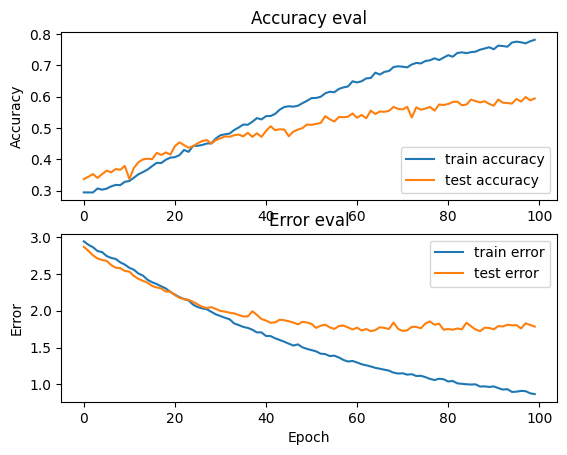

In [12]:
fig, axs = plt.subplots(2)

# create accuracy sublpot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

# create error sublpot
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [13]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.5944592952728271
